<a href="https://colab.research.google.com/github/Ruoro/hello-world/blob/main/Copy_of_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendtion System for Ecommerce Shop

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
print("import complete")

import complete


In [2]:
#Importing the data
data = pd.read_csv('ratings_beauty.csv')
print("Import complete")

Import complete


#### Data exploration

In [3]:
#summarize the data
data.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [4]:
#Displaying the first five columns of the data
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [5]:
#Shape of the data
data.shape

(2023070, 4)

In [6]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [7]:
data.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [8]:
#Check for missing values
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [9]:
# Number of users
print('The  dataset has', data['UserId'].nunique(), 'unique users')
# Number of movies
print('The  dataset has', data['ProductId'].nunique(), 'unique movies')
# Number of ratings
print('The  dataset has', data['Rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(data['Rating'].unique()))

The  dataset has 1210271 unique users
The  dataset has 249274 unique movies
The  dataset has 5 unique ratings
The unique ratings are [1.0, 2.0, 3.0, 4.0, 5.0]


In [10]:
#Importing Seaborn - a visualization library
import seaborn as sns

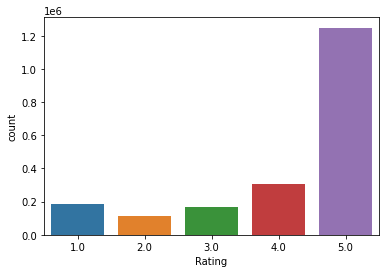

In [11]:
#Count number of every ratng graphically
sns.countplot(x='Rating', data=data)

In [12]:
# groping data 
x1 = data.groupby('ProductId')['UserId'].agg('count').reset_index()
x1

,ProductId,UserId
0,0205616461,1
1,0558925278,2
2,0733001998,1
3,0737104473,1
4,0762451459,1
...,...,...
249269,B00LORWRJA,1
249270,B00LOS7MEE,1
249271,B00LP2YB8E,1
249272,B00LPVG6V0,1


In [13]:
x1['UserId'].value_counts()

1      103484
2       42209
3       22334
4       13902
5        9623
        ...  
436         1
397         1
473         1
481         1
488         1
Name: UserId, Length: 588, dtype: int64

In [14]:
# finding the frequency of all products 
data['counts'] = data['ProductId'].map(data['ProductId'].value_counts())
data

,UserId,ProductId,Rating,Timestamp,counts
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200,1
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200,2
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200,2
3,A1WMRR494NWEWV,0733001998,4.0,1382572800,1
4,A3IAAVS479H7M7,0737104473,1.0,1274227200,1
...,...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000,1
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000,1
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400,1
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200,1


In [15]:
# Aggregate by movie
agg_ratings = data.groupby('ProductId').agg(mean_rating = ('Rating', 'mean'),
                                                count_rating = ('Rating', 'count')).reset_index()
# Check products with over 100 ratings
top_100 = agg_ratings[agg_ratings['count_rating']>100]

In [16]:
# view data frame
top_100.head()

,ProductId,mean_rating,count_rating
702,B00004TMFE,3.445255,137
704,B00004TUBL,4.634409,558
705,B00004TUBV,4.269006,171
710,B00004U9UY,4.726027,146
719,B000050B6U,4.175066,377


In [17]:
# Check popular products
top_100.sort_values(by='count_rating', ascending=False).head()

,ProductId,mean_rating,count_rating
65766,B001MA0QY2,4.321386,7533
10516,B0009V1YR8,3.568839,2869
110873,B0043OYFKU,4.310456,2477
2365,B0000YUXI0,4.405040,2143
105018,B003V265QW,4.365421,2088


In [18]:
# merge the dataset to obtain the final dataframe

df_popular = pd.merge(data, top_100[['ProductId']], on='ProductId', how='inner')
df_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610726 entries, 0 to 610725
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UserId     610726 non-null  object 
 1   ProductId  610726 non-null  object 
 2   Rating     610726 non-null  float64
 3   Timestamp  610726 non-null  int64  
 4   counts     610726 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 28.0+ MB


In [19]:
df_popular

,UserId,ProductId,Rating,Timestamp,counts
0,A12L11Y59Y8Z54,B00004TMFE,5.0,1405468800,137
1,AT8XDDCSNVTUC,B00004TMFE,3.0,1372636800,137
2,A4MYIJSQXELKX,B00004TMFE,5.0,1386374400,137
3,AJM18YFQ7FGVT,B00004TMFE,4.0,1306022400,137
4,A32Z2HPJI13Y19,B00004TMFE,1.0,1380672000,137
...,...,...,...,...,...
610721,A2EIA53X91F8J,B00L5JHZJO,5.0,1399939200,488
610722,A1MDF6GJDANUTH,B00L5JHZJO,5.0,1404604800,488
610723,A3T20TGEE4OPB5,B00L5JHZJO,5.0,1400716800,488
610724,A2MCFN2F0IINLY,B00L5JHZJO,5.0,1399939200,488


In [20]:
# check the values of the final 100 document
# Number of users
print('The popular_100 dataset has', df_popular['UserId'].nunique(), 'unique users')
# Number of movies
print('The popular_100 dataset has', df_popular['ProductId'].nunique(), 'unique movies')
# Number of popular_100
print('The popular_100 dataset has', df_popular['Rating'].nunique(), 'unique ratings')
# List of unique popular_100
print('The unique popular_100 are', sorted(df_popular['Rating'].unique()))

The popular_100 dataset has 464391 unique users
The popular_100 dataset has 2687 unique movies
The popular_100 dataset has 5 unique ratings
The unique popular_100 are [1.0, 2.0, 3.0, 4.0, 5.0]


Create a user matrix

In [ ]:
# Create user-item matrix
matrix = df_popular.pivot_table(index='ProductId', columns='UserId', values='Rating')
matrix.head()

Normalize the data


In [ ]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
matrix_norm.head()

In [ ]:
# # Item similarity matrix using Pearson correlation
# item_similarity = matrix_norm.T.corr()
# item_similarity.head()

In [ ]:
# Incase of cosine_similarity
# Item similarity matrix using cosine similarity
item_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
item_similarity_cosine